In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import glob, os#p.add_layer(atlas, cbar=False, cmap='copper', color_range=(-1,1), as_outline=True)
import matplotlib.pyplot as plt
import seaborn as sns

This is the first analysis for Nour's poster. This looks at global connectivity of the cortex (glasser).

In [2]:
# This grabs all correlations
all_fmri = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_space-MNI152NLin6Asym_seg-Glasser_stat-pearsoncorrelation_relmat.tsv'))

In [13]:
all_fmri

['/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/sub-trs001/ses-001/func/sub-trs001_ses-001_task-rest_space-MNI152NLin6Asym_seg-Glasser_stat-pearsoncorrelation_relmat.tsv',
 '/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/sub-trs002/ses-001/func/sub-trs002_ses-001_task-rest_space-MNI152NLin6Asym_seg-Glasser_stat-pearsoncorrelation_relmat.tsv',
 '/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/sub-trs003/ses-001/func/sub-trs003_ses-001_task-rest_space-MNI152NLin6Asym_seg-Glasser_stat-pearsoncorrelation_relmat.tsv',
 '/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/sub-trs004/ses-001/func/sub-trs004_ses-001_task-rest_space-MNI152NLin6Asym_seg-Glasser_stat-pearsoncorrelation_relmat.tsv',
 '/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/sub-trs006/ses-001/func/sub-trs006_ses-001_task-rest_space-MNI152NLin6Asym_seg-Glasser_stat-pearsoncorrelation_relmat.tsv',
 '/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/sub-trs009/ses-001/func/sub-trs009_ses-001_task-rest_space-MNI152NLin6Asym_seg-Glasser_stat-pearso

In [14]:
def fisher_z_transform(r):
    return 0.5 * np.log((1 + r) / (1 - r))

In [15]:
# Create a new list
gc_all = []
for fmri in all_fmri:
    #To load my data:
    correlation_matrix = pd.read_csv(fmri, sep='\t')
    #To exclude Node column:
    correlation_matrix_numbers = correlation_matrix.iloc[:, 1:]
    #Replace 1 with NaN:
    correlation_matrix_no_ones = correlation_matrix_numbers.replace(1, np.nan)
    correlation_matrix_z = correlation_matrix_no_ones.map(lambda r: fisher_z_transform(r) if not np.isnan(r) else np.nan) 
    #Get average of all correlation values
    gc = np.nanmean(correlation_matrix_z)
    subid =  os.path.basename(fmri).split('_')[0]
    if int(subid[-3:]) < 500:
        group = 'clz'
    else:
        group = 'ola'
    gc_all.append([subid, group, gc])

In [16]:
gc_df = pd.DataFrame(gc_all, columns=['subid', 'group', 'gc'])

In [17]:
gc_df.subid.unique()

array(['sub-trs001', 'sub-trs002', 'sub-trs003', 'sub-trs004',
       'sub-trs006', 'sub-trs009', 'sub-trs010', 'sub-trs013',
       'sub-trs501', 'sub-trs502', 'sub-trs503', 'sub-trs504',
       'sub-trs505', 'sub-trs506', 'sub-trs507', 'sub-trs508',
       'sub-trs509', 'sub-trs510', 'sub-trs511', 'sub-trs512'],
      dtype=object)

/tmp/ipykernel_3919/166858688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gc_df, x='group', palette=palette, y='gc')


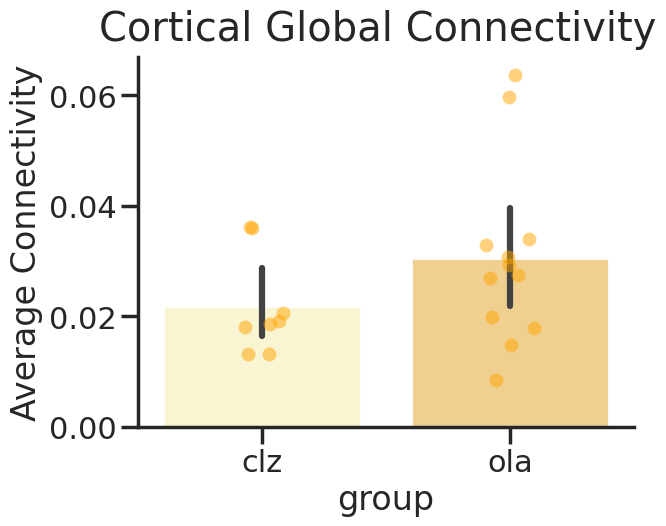

In [18]:
sns.set_theme(context='poster', style='ticks')
palette = ['#FFFACD', '#FFD580']
sns.barplot(data=gc_df, x='group', palette=palette, y='gc')
sns.stripplot(data=gc_df, x='group', y='gc', color='#FFA500', alpha=0.5, size=10)
plt.suptitle('Cortical Global Connectivity')
sns.despine()
plt.ylabel('Average Connectivity')
plt.savefig('/BICNAS2/tuominen/trsnrm/scripts/first', dpi=900, transparent=False)


In [19]:
stats.ttest_ind(gc_df.loc[gc_df.group=='ola', 'gc'],
               gc_df.loc[gc_df.group=='clz', 'gc'])

TtestResult(statistic=1.3340463178432456, pvalue=0.19882275774998326, df=18.0)

This is the first analysis for Nour's poster. This looks at global connectivity of the subcortex (tian).

In [47]:
# This grabs all correlations
all_fmri = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_space-MNI152NLin6Asym_seg-Tian_stat-pearsoncorrelation_relmat.tsv'))

In [20]:
# Create a new list
gc_all = []
for fmri in all_fmri:
    #To load my data:
    correlation_matrix = pd.read_csv(fmri, sep='\t')
    #To exclude Node column:
    correlation_matrix_numbers = correlation_matrix.iloc[:, 1:]
    #Replace 1 with NaN:
    correlation_matrix_no_ones = correlation_matrix_numbers.replace(1, np.nan)
    correlation_matrix_z = correlation_matrix_no_ones.map(lambda r: fisher_z_transform(r) if not np.isnan(r) else np.nan) 
    #Get average of all correlation values
    gc = np.nanmean(correlation_matrix_z)
    subid =  os.path.basename(fmri).split('_')[0]
    if int(subid[-3:]) < 500:
        group = 'clz'
    else:
        group = 'ola'
    gc_all.append([subid, group, gc])

In [21]:
gc_df = pd.DataFrame(gc_all, columns=['subid', 'group', 'gc'])

/tmp/ipykernel_3919/2137658007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gc_df, x='group', palette=palette, y='gc')


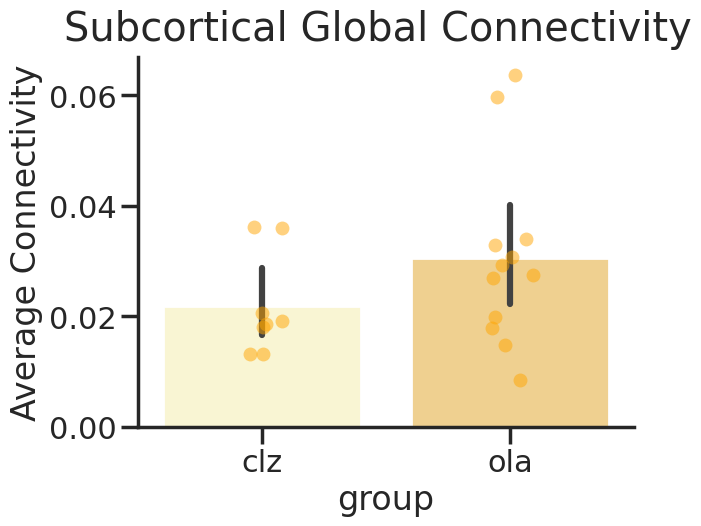

In [22]:
sns.set_theme(context='poster', style='ticks')
palette = ['#FFFACD', '#FFD580']
sns.barplot(data=gc_df, x='group', palette=palette, y='gc')
sns.stripplot(data=gc_df, x='group', y='gc', color='#FFA500', alpha=0.5, size=10)
plt.suptitle('Subcortical Global Connectivity')
plt.ylabel('Average Connectivity')
sns.despine()

In [23]:
stats.ttest_ind(gc_df.loc[gc_df.group=='ola', 'gc'],
               gc_df.loc[gc_df.group=='clz', 'gc'])

TtestResult(statistic=1.3340463178432456, pvalue=0.19882275774998326, df=18.0)

Same thing but for ReHo

In [52]:
# This grabs all correlations
run1_reho = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_run-01_space-MNI152NLin6Asym_seg-Glasser_stat-reho_bold.tsv'))
run2_reho = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_run-02_space-MNI152NLin6Asym_seg-Glasser_stat-reho_bold.tsv'))
# Create a new list
reho_all = []
for i,reho in enumerate([run1_reho, run2_reho]):
    for r in reho:
        reho_values = pd.read_csv(r, sep='\t')
        reho_z = reho_values.map(lambda r: fisher_z_transform(r) if not np.isnan(r) else np.nan) 
        reho_mean = np.nanmean(reho_z)
        subid =  os.path.basename(r).split('_')[0]
        run = f'run_{i+1}'
        if int(subid[-3:]) < 500:
            group = 'clz'
        else:
            group = 'ola'
        reho_all.append([subid, group, reho_mean, run])

In [53]:
reho_df = pd.DataFrame(reho_all, columns=['subid', 'group', 'reho', 'run'])

/tmp/ipykernel_2574149/2437371695.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  g = sns.stripplot(data=reho_df, x='run', y='reho', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, legend=False, palette=sns.color_palette('Greys', n_colors=1))


Text(0.5, 0.98, 'ReHo (Glasser)')

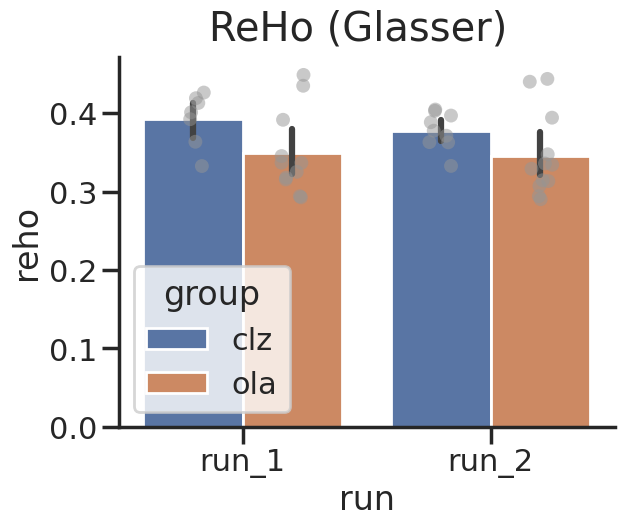

In [54]:
fig, ax = plt.subplots()
g = sns.barplot(data=reho_df, x='run', y='reho', hue='group', dodge=True, ax=ax, legend=True)
g = sns.stripplot(data=reho_df, x='run', y='reho', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, legend=False, palette=sns.color_palette('Greys', n_colors=1))
sns.despine()
plt.suptitle('ReHo (Glasser)')

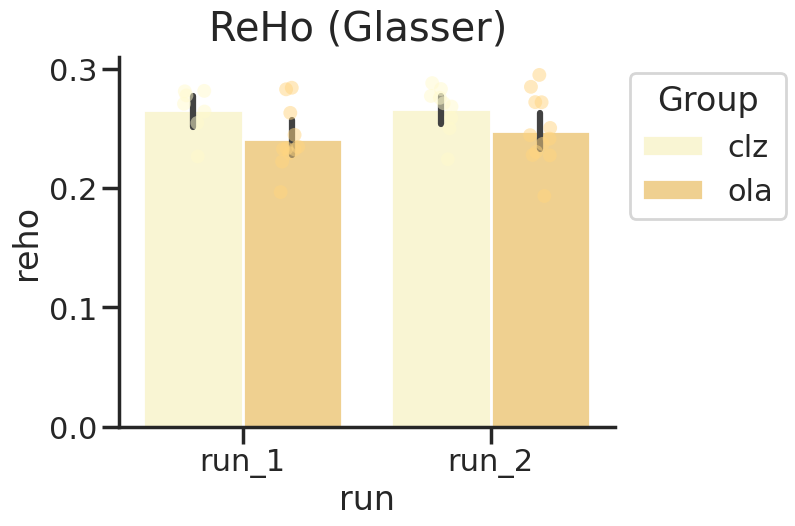

In [87]:
sns.set_theme(context='poster', style='ticks')
custom_palette = {'clz': '#FFFACD', 'ola': '#FFD580'} 
fig, ax = plt.subplots()
g = sns.barplot(data=reho_df, x='run', y='reho', hue='group', dodge=True, ax=ax, palette=custom_palette)
g = sns.stripplot(data=reho_df, x='run', y='reho', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, palette=custom_palette, legend=False)# Remove spines and set the title
sns.despine()
plt.suptitle('ReHo (Glasser)')# Adjust legend to show only once
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Group", loc='upper left', bbox_to_anchor=(1, 1))

In [55]:
reho_mean = reho_df.groupby(['group','subid']).mean(numeric_only=True).reset_index()

In [56]:
stats.ttest_ind(reho_mean.loc[reho_mean.group=='ola', 'reho'],
               reho_mean.loc[reho_mean.group=='clz', 'reho'])

TtestResult(statistic=-1.964740193730175, pvalue=0.06423941802448217, df=19.0)

In [57]:
# This grabs all correlations
run1_reho = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_run-01_space-MNI152NLin6Asym_seg-Tian_stat-reho_bold.tsv'))
run2_reho = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_run-02_space-MNI152NLin6Asym_seg-Tian_stat-reho_bold.tsv'))
# Create a new list
reho_all = []
for i,reho in enumerate([run1_reho, run2_reho]):
    for r in reho:
        reho_values = pd.read_csv(r, sep='\t')
        reho_z = reho_values.map(lambda r: fisher_z_transform(r) if not np.isnan(r) else np.nan)
        reho_mean = np.nanmean(reho_z)
        subid =  os.path.basename(r).split('_')[0]
        run = f'run_{i+1}'
        if int(subid[-3:]) < 500:
            group = 'clz'
        else:
            group = 'ola'
        reho_all.append([subid, group, reho_mean, run])

In [58]:
reho_df = pd.DataFrame(reho_all, columns=['subid', 'group', 'reho', 'run'])

/tmp/ipykernel_2574149/793107249.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  g = sns.stripplot(data=reho_df, x='run', y='reho', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, legend=False, palette=sns.color_palette('Greys', n_colors=1))


Text(0.5, 0.98, 'ReHo (Tian)')

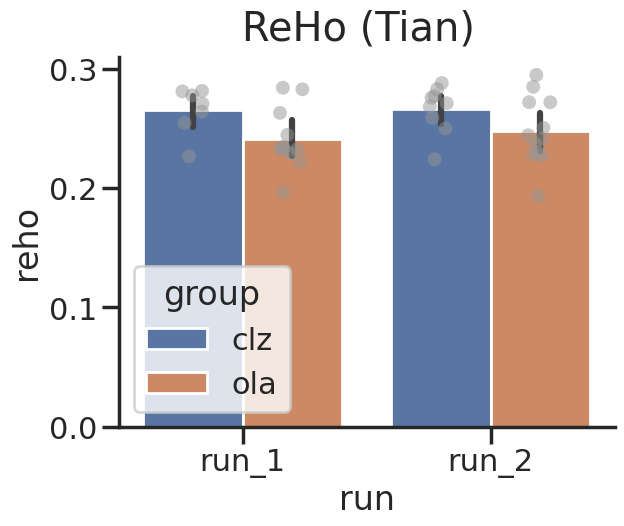

In [59]:
fig, ax = plt.subplots()
g = sns.barplot(data=reho_df, x='run', y='reho', hue='group', dodge=True, ax=ax, legend=True)
g = sns.stripplot(data=reho_df, x='run', y='reho', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, legend=False, palette=sns.color_palette('Greys', n_colors=1))
sns.despine()
plt.suptitle('ReHo (Tian)')

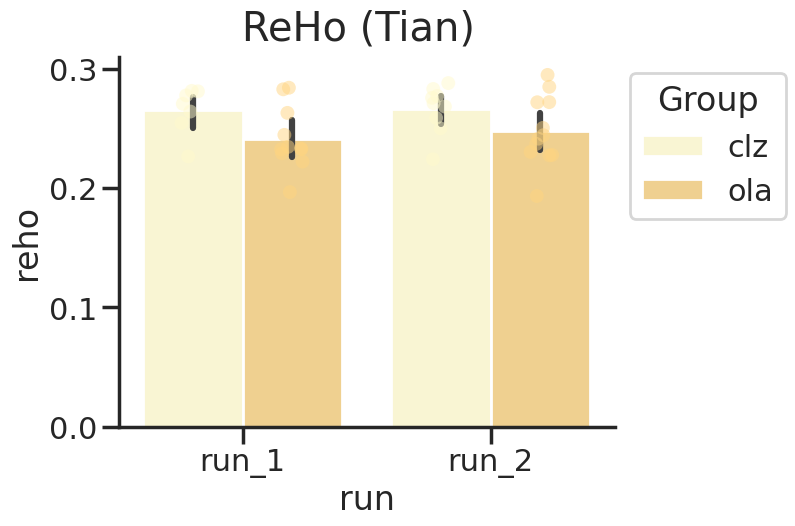

In [89]:
sns.set_theme(context='poster', style='ticks')
custom_palette = {'clz': '#FFFACD', 'ola': '#FFD580'}  
fig, ax = plt.subplots()
sns.barplot(data=reho_df, x='run', y='reho', hue='group', dodge=True, ax=ax, palette=custom_palette)# Strip plot with custom colors
sns.stripplot(data=reho_df, x='run', y='reho', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, palette=custom_palette, legend=False)# Remove spines and set the title
sns.despine()
plt.suptitle('ReHo (Tian)')# Adjust legend to not overlap the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Group", loc='upper left', bbox_to_anchor=(1, 1))

In [90]:
reho_mean = reho_df.groupby(['group','subid']).mean(numeric_only=True).reset_index()

In [91]:
stats.ttest_ind(reho_mean.loc[reho_mean.group=='ola', 'reho'],
               reho_mean.loc[reho_mean.group=='clz', 'reho'])

TtestResult(statistic=-1.9904324561472182, pvalue=0.061126384485030424, df=19.0)

Same thing but for alff

In [92]:
# This grabs all correlations
run1_alff = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_run-01_space-MNI152NLin6Asym_seg-Glasser_stat-alff_bold.tsv'))
run2_alff = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_run-02_space-MNI152NLin6Asym_seg-Glasser_stat-alff_bold.tsv'))
# Create a new list
alff_all = []
for i,alff in enumerate([run1_alff, run2_alff]):
    for a in alff:
        alff_values = pd.read_csv(a, sep='\t')
        alff_mean = np.nanmean(alff_values)
        subid =  os.path.basename(a).split('_')[0]
        run = f'run_{i+1}'
        if int(subid[-3:]) < 500:
            group = 'clz'
        else:
            group = 'ola'
        alff_all.append([subid, group, alff_mean, run])

In [93]:
alff_values

,Right_V1,Right_MST,Right_V6,Right_V2,Right_V3,Right_V4,Right_V8,Right_4,Right_3b,Right_FEF,...,Left_p47r,Left_TGv,Left_MBelt,Left_LBelt,Left_A4,Left_STSva,Left_TE1m,Left_PI,Left_a32pr,Left_p24
0,12.272521,10.180185,9.551755,15.226639,12.293083,10.753785,16.737436,10.495271,10.117635,9.700487,...,9.993473,16.392027,18.154785,14.160458,12.251355,11.284877,NaN,21.047428,9.986666,13.75349


In [94]:
alff_df = pd.DataFrame(alff_all, columns=['subid', 'group', 'alff', 'run'])

/tmp/ipykernel_2574149/4192298660.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  g = sns.stripplot(data=alff_df, x='run', y='alff', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, legend=False, palette=sns.color_palette('Greys', n_colors=1))


Text(0.5, 0.98, 'Alff (Glasser)')

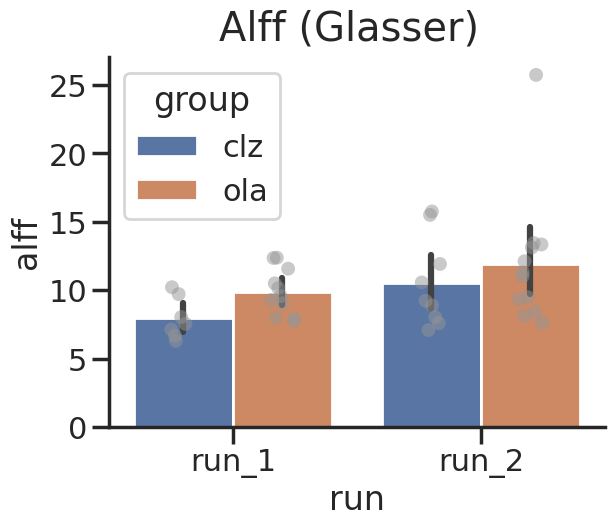

In [65]:
fig, ax = plt.subplots()
g = sns.barplot(data=alff_df, x='run', y='alff', hue='group', dodge=True, ax=ax, legend=True)
g = sns.stripplot(data=alff_df, x='run', y='alff', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, legend=False, palette=sns.color_palette('Greys', n_colors=1))
sns.despine()
plt.suptitle('Alff (Glasser)')

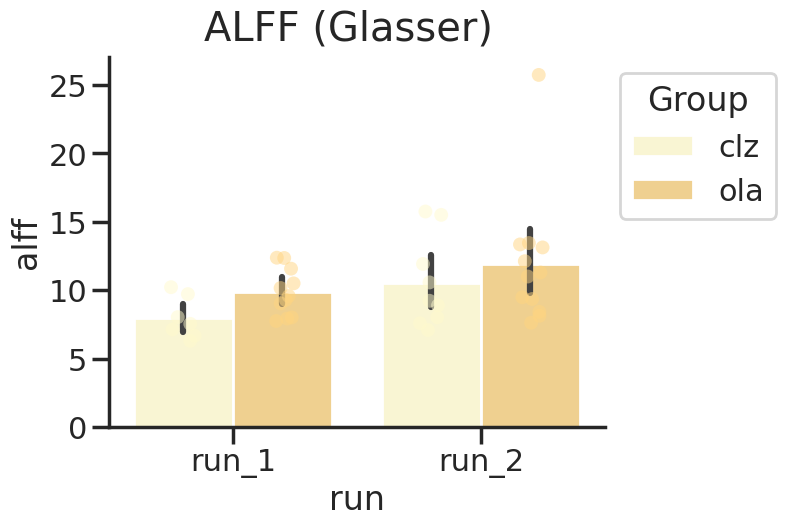

In [96]:
sns.set_theme(context='poster', style='ticks')
custom_palette = {'clz': '#FFFACD', 'ola': '#FFD580'}
fig, ax = plt.subplots()
# Bar plot with custom colors
sns.barplot(data=alff_df, x='run', y='alff', hue='group', dodge=True, ax=ax, palette=custom_palette)
sns.stripplot(data=alff_df, x='run', y='alff', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, palette=custom_palette, legend=False)
sns.despine()
plt.suptitle('ALFF (Glasser)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Group", loc='upper left', bbox_to_anchor=(1, 1))

In [66]:
stats.ttest_ind(alff_df.loc[(alff_df.group=='ola') & (alff_df.run=='run_1'), 'alff'],
               alff_df.loc[(alff_df.group=='clz') & (alff_df.run=='run_1'), 'alff'])

TtestResult(statistic=2.449315993681463, pvalue=0.026208605845953827, df=16.0)

In [67]:
alff_mean = alff_df.groupby(['group','subid']).mean(numeric_only=True).reset_index()

In [68]:
stats.ttest_ind(alff_mean.loc[alff_mean.group=='ola', 'alff'],
               alff_mean.loc[reho_mean.group=='clz', 'alff'])

TtestResult(statistic=1.1163144280632353, pvalue=0.27820685001273693, df=19.0)

In [69]:
# This grabs all correlations
run1_alff = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_run-01_space-MNI152NLin6Asym_seg-Tian_stat-alff_bold.tsv'))
run2_alff = sorted(glob.glob('/BICNAS2/tuominen/trsnrm/derivatives/trs_fc2/**/ses-001/func/*task-rest_run-02_space-MNI152NLin6Asym_seg-Tian_stat-alff_bold.tsv'))
# Create a new list
alff_all = []
for i,alff in enumerate([run1_alff, run2_alff]):
    for a in alff:
        alff_values = pd.read_csv(a, sep='\t')
        alff_mean = np.nanmean(alff_values)
        subid =  os.path.basename(a).split('_')[0]
        run = f'run_{i+1}'
        if int(subid[-3:]) < 500:
            group = 'clz'
        else:
            group = 'ola'
        alff_all.append([subid, group, alff_mean, run])

In [70]:
alff_df = pd.DataFrame(alff_all, columns=['subid', 'group', 'alff', 'run'])

/tmp/ipykernel_2574149/1915439319.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  g = sns.stripplot(data=alff_df, x='run', y='alff', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, legend=False, palette=sns.color_palette('Greys', n_colors=1))


Text(0.5, 0.98, 'Alff (Tian)')

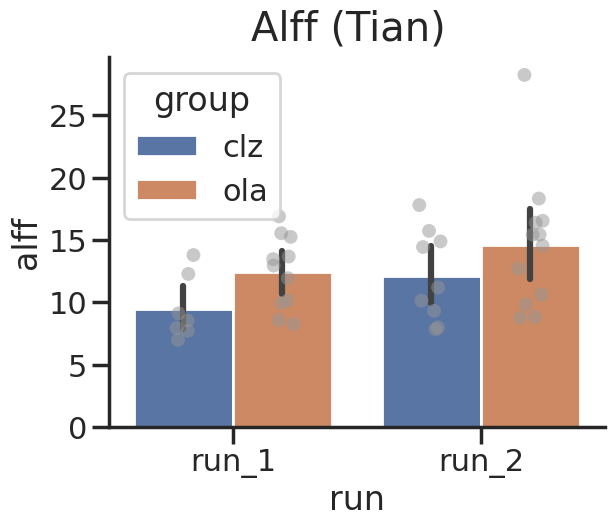

In [71]:
fig, ax = plt.subplots()
g = sns.barplot(data=alff_df, x='run', y='alff', hue='group', dodge=True, ax=ax, legend=True)
g = sns.stripplot(data=alff_df, x='run', y='alff', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, legend=False, palette=sns.color_palette('Greys', n_colors=1))
sns.despine()
plt.suptitle('Alff (Tian)')

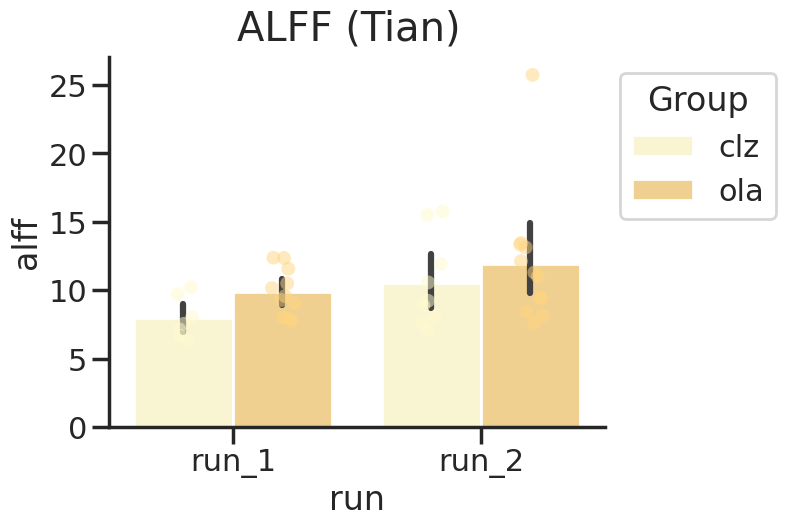

In [97]:
sns.set_theme(context='poster', style='ticks')
custom_palette = {'clz': '#FFFACD', 'ola': '#FFD580'}  
fig, ax = plt.subplots()
sns.barplot(data=alff_df, x='run', y='alff', hue='group', dodge=True, ax=ax, palette=custom_palette)
sns.stripplot(data=alff_df, x='run', y='alff', hue='group', alpha=0.5, size=10, dodge=True, ax=ax, palette=custom_palette, legend=False)
sns.despine()
plt.suptitle('ALFF (Tian)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Group", loc='upper left', bbox_to_anchor=(1, 1)) 

In [98]:
stats.ttest_ind(alff_df.loc[(alff_df.group=='ola') & (alff_df.run=='run_1'), 'alff'],
               alff_df.loc[(alff_df.group=='clz') & (alff_df.run=='run_1'), 'alff'])

TtestResult(statistic=2.449315993681463, pvalue=0.026208605845953827, df=16.0)

In [99]:
alff_mean = alff_df.groupby(['group','subid']).mean(numeric_only=True).reset_index()

In [100]:
stats.ttest_ind(alff_mean.loc[alff_mean.group=='ola', 'alff'],
               alff_mean.loc[reho_mean.group=='clz', 'alff'])

TtestResult(statistic=1.1163144280632353, pvalue=0.27820685001273693, df=19.0)